## Mushroom Predictions

First, we import the modules we'll need and recreate the mushrooms dataframe from last week's assignment, including the the numberical replacements for the values.  

That assignment can be located at the github link https://github.com/johnnymango/IS362stuff/blob/master/Johnny's%20Mushroom%20Analysis.ipynb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the url and create the pandas dataframe
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

mushrooms = pd.read_csv(url, header=None, usecols=(0,5,21))
mushrooms.columns = ['mr_class', 'odor', 'population']

In [3]:
#Updates the class column
mushrooms['mr_class'].replace('e', 0, inplace=True)
mushrooms['mr_class'].replace('p', 1, inplace=True)

#Updates the odor column
mushrooms['odor'].replace('a', 0, inplace=True)
mushrooms['odor'].replace('l', 1, inplace=True)
mushrooms['odor'].replace('c', 2, inplace=True)
mushrooms['odor'].replace('y', 3, inplace=True)
mushrooms['odor'].replace('f', 4, inplace=True)
mushrooms['odor'].replace('m', 5, inplace=True)
mushrooms['odor'].replace('n', 6, inplace=True)
mushrooms['odor'].replace('p', 7, inplace=True)
mushrooms['odor'].replace('s', 8, inplace=True)

#Updates the population column
mushrooms['population'].replace('a', 0, inplace=True)
mushrooms['population'].replace('c', 1, inplace=True)
mushrooms['population'].replace('n', 2, inplace=True)
mushrooms['population'].replace('s', 3, inplace=True)
mushrooms['population'].replace('v', 4, inplace=True)
mushrooms['population'].replace('y', 5, inplace=True)

mushrooms.tail()

,mr_class,odor,population
8119,0,6,1
8120,0,6,4
8121,0,6,1
8122,1,3,4
8123,0,6,1


### This creates a data from with 8124 observations and 3 features.

In [4]:
mushrooms.shape

(8124, 3)

## My Original Hypothesis

We'll attempt to predict edible vs poisonous (mr_class) response based on the odor and population features. Last week, I hypothesized that population type would be a predictor of whether a mushroom was edible or poisonous.  This was partly based on the plots that showed a positive association between population type and mr_class as the value approached 1 (poisonous).  The pairplot below visualizes the data.

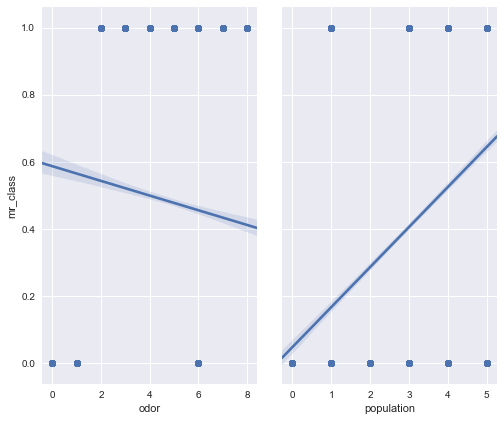

In [5]:
sns.pairplot(mushrooms, x_vars=['odor', 'population'], y_vars='mr_class', size=6, 
             aspect=0.6, kind='reg') 

## Predictive Analysis

To perform the analysis, I'll use the steps outlined in Kevin Markham videos for Machine Learning.  We'll start off by evaluating both features (odor, population) and then check each individually to see if one is a better predictor.

### Step 1 is to create the X feature matrix and the y vector required by the analysis.

In [6]:
X = mushrooms[['odor', 'population']]
X.head()

,odor,population
0,7,3
1,0,2
2,1,2
3,7,3
4,6,0


In [7]:
y = mushrooms['mr_class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: mr_class, dtype: int64

### Step 2  Train/Test Split

In this step, we will split the data to create the training and testing datasets for the odor and population features and the mr_class response.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(6093, 2)
(6093,)
(2031, 2)
(2031,)


### Step 3 Finding the right model

In step 3, I'll evaluate the models for the best accuracy score.  Since this is a classification problem, I will test the logistic regression and KNN models.

### Evaluate Logistic Regression

I import the module and instantiate the logistic regression.  I fit the model using the training dataset and then compare the y_test values against the y_pred values to calculate the accuracy.

In [9]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#### The logistic regression model indicates an accuracy of 71%.

In [10]:
print (metrics.accuracy_score(y_test, y_pred))

0.706548498277


### Evaluate K Nearest Neighbor

I import the module and instantiate the knn model with a k=5. I fit it with the training data and then compare y_test against y_predict to calculate the accuracy.

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

### Step 4 The knn model indicates an accuracy of 98% with k=5

The knn model has a significantly better accuracy score than the logistic regression model.  I will use KNN to evaluate the association between the odor and population features to the mr_class response.

In [12]:
print (metrics.accuracy_score(y_test, y_pred))

0.982274741507


### Selecting a better value for K  

(Source from Kevin Markham Video)
I checked and plotted k values between 1-25 to check for values of k that improved the accuracy score.  In this particular case, all k values in this range returned the same accuracy score.  

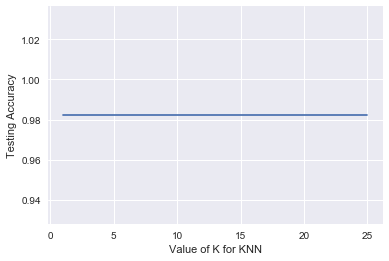

In [13]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Step 5 Checking Each Feature

Using the KNN model with k=5, I recreated the X matrix using one feature at time.  

#### For the odor feature, the accuracy score is 98%.

In [14]:
X = mushrooms[['odor']]
y = mushrooms['mr_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.982274741507


#### For the population feature, the accuracy score is 75%.

In [15]:
X = mushrooms[['population']]
y = mushrooms['mr_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.746430329887


# Conclusion

Based on the KNN analysis, odor alone is able to predict whether a mushroom is edible or poisonous with 98% accuracy.  Given that the accuracy did not change when population was removed from the matrix, I would also assume that population has no association at all on determining whether a mushroom is edible (or not).

With a 98% accuracy rate, odor alone is a good predictor.  My next step might be to test other individual features to see if they score that high or higher and then check to see if a combination of these high scoring features yields a better accuracy score.
